In [1]:
import numpy as np

In [2]:
# 농어 길이
perch_length = np.array(
                [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
                 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
                 22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
                 27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
                 36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
                 40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
                 )
# 농어 무게 
perch_weight = np.array(
                [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
                 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
                 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
                 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
                 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
                 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
                 1000.0, 1000.0]
                 )

In [3]:
print(perch_length.shape, perch_weight.shape)

(56,) (56,)


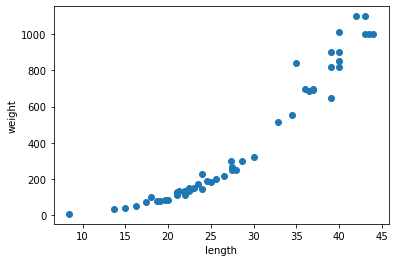

In [4]:
# 예측까지 실행해 주세요 
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [5]:
# 데이터 분류하기 
# 2단계 => 3:4 
# 3단계 => 3:3:4
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight, test_size =0.25, random_state = 42)

print (train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(42,) (42,)
(14,) (14,)


In [6]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [7]:
from sklearn.neighbors import KNeighborsRegressor

In [8]:
knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input,train_target)

knr.score(test_input,test_target)


0.9746459963987609

In [9]:
# 임의의 값 예측하기 
print(knr.predict([[50]]))

[1033.33333333]


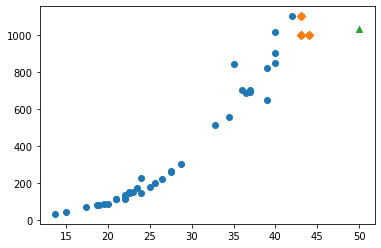

In [10]:
# 산점도 그리기 
# 훈련데이터, 50cm, 이웃 3개 산점도 모두 그리기 

# 이웃 3개 찾기 
distances, indexes = knr.kneighbors([[50]])
# 훈련데이터 산점도 그리기 
plt.scatter(train_input,train_target)
# 이웃 3개 산점도 그리기
plt.scatter(train_input[indexes],train_target[indexes],marker = 'D')
# 50cm 산점도 그리기 
plt.scatter(50,1033,marker='^')

plt.show()

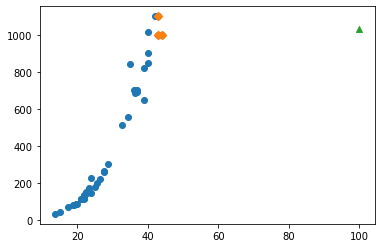

In [11]:
# 산점도 그리기 
# 훈련데이터, 50cm, 이웃 3개 산점도 모두 그리기 

# 이웃 3개 찾기 
distances, indexes = knr.kneighbors([[100]])
# 훈련데이터 산점도 그리기 
plt.scatter(train_input,train_target)
# 이웃 3개 산점도 그리기
plt.scatter(train_input[indexes],train_target[indexes],marker = 'D')
# 50cm 산점도 그리기 
plt.scatter(100,1033,marker='^')

plt.show()
# x 축이 늘어나도 가장 가까운 표면 값만 측정을 한다 -> KNN의 단점 
# (해석)
# - KNN 모델은 이웃하는 가장 가까운 개수를 체크하기 때문에 
#   예측에 어려움이 있다. -> KNN의 한계

# 선형 회귀(Linear Regression)

In [12]:
# - 널리 사용되는 대표적인 회귀 알고리즘 
# - 비교적 간단하고, 성능이 뛰어나기 떄문에 회귀 모델 수행 시 초반에 주로 진행 
# - 선형회귀의 역할 : 하나의 특성을 가장 잘 나타내는 직선(추세선)을 찾아내는 것 
# - 훈련(fit) 평가(score) 예측(predict) 함수는 모두 기존과 동일함 

In [13]:
# 선형 회귀 모델 라이브러리 불러들이기 
from sklearn.linear_model import LinearRegression

In [14]:
# 모델 생성 
lr = LinearRegression()
lr

LinearRegression()

In [18]:
# 모델 훈련시키기 
lr.fit(train_input,train_target)

LinearRegression()

In [19]:
#KNN 에서 농어의 길이 50을 1033으로 예측 
#선형회귀 모델은 50을 어떻게 예측할까?
print(lr.predict(([50],[100]))

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_18800/3577676454.py, line 3)

In [21]:
# 기울기와 절편 확인하기 
# 선형회귀 모델 : y = a * x + b
# a : 기울기, b : 절편
print("기울기= ", lr.coef_, "/ 절편 = ",lr.intercept_)

기울기=  [39.01714496] / 절편 =  -709.0186449535477


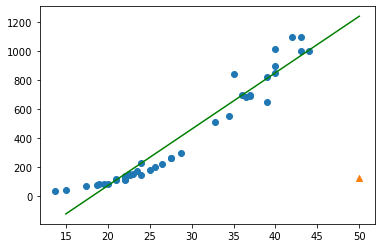

In [22]:
# 50의 위치 확인및 추세선 그리기 
# 산점도 그리기 
# 훈련데이터, 50 길이, 추세선모두 그리기 
plt.scatter(train_input,train_target)
plt.scatter(50,124.8,marker= "^")
plt.plot([15,50], [lr.coef_ * 15 + lr.intercept_,
                 lr.coef_ * 50 + lr.intercept_], c = "green")

In [23]:
# 과적합 여부 확인하기 -> 차이 0.1 대 => 과대적합이 다소 보인다 
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

# (해석)
# - 다소 과대적합이 보이기는 하지만, 그래도 사용해도 될 정도의 훈련모델이다 
# - 다만, 과대적합을 의심하지 않을 수는 없다 


0.939846333997604
0.8247503123313558


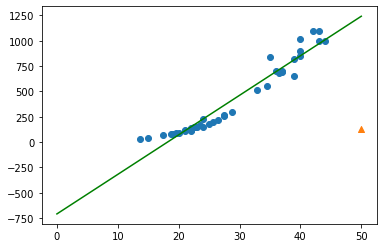

In [24]:
# 50의 위치 확인및 추세선 그리기 
# 산점도 그리기 
# 훈련데이터, 50 길이, 추세선모두 그리기 
plt.scatter(train_input,train_target)
plt.scatter(50,124.8,marker= "^")
plt.plot([0,50], [lr.coef_ * 0 + lr.intercept_,
                 lr.coef_ * 50 + lr.intercept_], c = "green")
# (해석)
# 추세선의 x 값이 0 일 때 무게 값이 -값이 나온다 => 문제가 있다
# 산점도를보면 곡선의 형태를 띈다 -> 다른 모델 사용

## 다항회귀 


In [25]:
import numpy as np

In [ ]:
# x의 제곱승 값과 ,x 값 두개가 필요하다
train_poly = np.column_stack((train_input ** 2, train_target))
test_poly = np.column_stack((test_input ** 2, test_target))
print(train_poly.shape)

In [ ]:
# 모델 생성 
lr = LinearRegression()
lr

In [ ]:
# 모델 훈련시키기 
lr.fit(train_poly,train_target)

In [ ]:
# 기울기와 절편 확인하기 
# y = a * x^2 + b * x + c 
print(lr.coef_, lr.intercept_)

In [ ]:
print(lr.predict([[50**2,50]]))

In [ ]:
# 추세선 그리기 
# 훈련데이터, 50 길이, 추세선모두 그리기 

point = np.arange(15,51)

plt.scatter(train_poly,train_target)
plt.scatter([50],[1574],marker= "^")
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05, c = "green")


In [ ]:
# 다항회귀 선형회귀모델 과적합 여부 확인하기 
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
## 과소 적합이 발생, 미세하게 그대로 모델을 사용할 수 도 있지만, 
# 대안이 있는지 확인은 필요함 
# - 과소적합이 일어난 경우 해결법 
# # 데이터 양을 을인다 
# : 복잡도를 늘인다 
#     선형회귀 모델에서는 복잡도를ㄹ 늘리기 위해 여러개의 특성(독립변수)를 생성해서 사용
# -> 특성을 늘리는 것 => 다중회귀 분석을 수행함 독립변수가 여러개 